In [1]:
import pandas as pd
import json
import numpy as np

In [2]:
yearly_totals = pd.read_csv('/home/max/Documents/papers/regional-impacts-map/figure_data/yearly_totals.csv')
yearly_totals = yearly_totals[(yearly_totals.PY>1985) & (yearly_totals.PY<2020)].sort_values('PY').reset_index()
yearly_totals['label'] = yearly_totals.apply(
    lambda x: f'{x["PY"]:.0f} - {x["mid"]:,.0f} ({x["lb"]:,.0f}-{x["ub"]:,.0f})', axis=1
)
yearly_totals.to_json('data/yearly_totals.json',orient="records")
yearly_totals.tail()

,index,PY,lb,ub,mid,label
29,31,2015.0,4374.0,11061,6901.0,"2015 - 6,901 (4,374-11,061)"
30,32,2016.0,4714.0,12169,7559.0,"2016 - 7,559 (4,714-12,169)"
31,33,2017.0,5158.0,12848,8040.0,"2017 - 8,040 (5,158-12,848)"
32,34,2018.0,5473.0,13846,8567.0,"2018 - 8,567 (5,473-13,846)"
33,35,2019.0,6004.0,15078,9359.0,"2019 - 9,359 (6,004-15,078)"


In [3]:
impact_totals = pd.read_csv('/home/max/Documents/papers/regional-impacts-map/figure_data/impact_totals.csv')
impact_totals['label'] = impact_totals.apply(
    lambda x: f'{x["mid"]:,.0f} ({x["lb"]:,.0f}-{x["ub"]:,.0f})', axis=1
)
impact_totals['dataseries'] = "impacts"
#impact_totals['name'] = impact_totals.name.str.replace('and','and')
impact_totals.to_json('data/impact_totals.json',orient="records")
impact_totals.tail()

,name,mid,ub,lb,label,dataseries
1,Human and\nmanaged systems,12180,26130,6518,"12,180 (6,518-26,130)",impacts
2,"Mountains, snow and ice",6306,12225,3526,"6,306 (3,526-12,225)",impacts
3,"Rivers, lakes\n and soil moisture",12801,25152,7053,"12,801 (7,053-25,152)",impacts
4,Terrestrial ES,34974,65631,18516,"34,974 (18,516-65,631)",impacts
5,Other,23596,55682,9555,"23,596 (9,555-55,682)",impacts


In [4]:
continent_totals = pd.read_csv('/home/max/Documents/papers/regional-impacts-map/figure_data/continent_totals.csv')
continent_totals['label'] = continent_totals.apply(
    lambda x: f'{x["mid"]:,.0f} ({x["lb"]:,.0f}-{x["ub"]:,.0f})', axis=1
)
continent_totals['dataseries'] = "continents"
#impact_totals['name'] = impact_totals.name.str.replace('and','and')
continent_totals.to_json('data/continent_totals.json',orient="records")
continent_totals.tail()

,name,mid,ub,lb,label,dataseries
1,South America,4734,7754,3005,"4,734 (3,005-7,754)",continents
2,Europe,17746,28687,11191,"17,746 (11,191-28,687)",continents
3,Africa,7573,12205,4610,"7,573 (4,610-12,205)",continents
4,Asia,27638,41313,18700,"27,638 (18,700-41,313)",continents
5,Oceania,7404,11640,4626,"7,404 (4,626-11,640)",continents


In [5]:
df = pd.read_csv('/home/max/Documents/papers/regional-impacts-map/data/2_merged_da_data.csv')
df = df.sort_values(['LAT','LON'],ascending=[False, True])
df.head()

,LAT,LON,LAT_25,LON_25,LAT_5,LON_5,knutson_precip,updated_precip,knutson_temp,updated_temp,...,precip_da_cat,temp_da_cat,temp_da_binary,precip_da_binary,n_da_impacts,max_da_cat,study_addition,total_study_prop,area,is_land
10224,88.75,-178.75,88.75,-178.75,87.5,-177.5,NaN,NaN,NaN,NaN,...,0.0,0.0,0,0,0,0.0,add,0.327727,1685.654015,False
10225,88.75,-176.25,88.75,-176.25,87.5,-177.5,NaN,NaN,NaN,NaN,...,0.0,0.0,0,0,0,0.0,add,0.327727,1685.654015,False
10226,88.75,-173.75,88.75,-173.75,87.5,-172.5,NaN,NaN,NaN,NaN,...,0.0,0.0,0,0,0,0.0,add,0.327727,1685.654015,False
10227,88.75,-171.25,88.75,-171.25,87.5,-172.5,NaN,NaN,NaN,NaN,...,0.0,0.0,0,0,0,0.0,add,0.327727,1685.654015,False
10228,88.75,-168.75,88.75,-168.75,87.5,-167.5,NaN,NaN,NaN,NaN,...,0.0,0.0,0,0,0,0.0,add,0.327727,1685.654015,False


In [6]:
lon = df.LON_5.unique()
lat = df.LAT_5.unique()[::-1]
fnames = [
    '/home/max/Documents/papers/regional-impacts-map/data/d_a/trend_1951_2019_hadcrut_v1.npy',
    '/home/max/Documents/papers/regional-impacts-map/data/d_a/trend_1951_2018_af_v1.npy'
]

var_names = [
    "obs_temp",
    "af_temp"
]

for fname, var_name in zip(fnames,var_names):
    trend_df = pd.DataFrame(np.load(fname))
    trend_df.columns = lon
    trend_df.index = lat
    trend_df = trend_df.melt(ignore_index=False).reset_index().rename(columns={
        "index": "LAT_5",
        "variable": "LON_5",
        "value": var_name
    }
    )
    if var_name in df.columns:
        df = df.drop(columns=var_name)
    df = df.merge(trend_df,how="left")

df

,LAT,LON,LAT_25,LON_25,LAT_5,LON_5,knutson_precip,updated_precip,knutson_temp,updated_temp,...,temp_da_binary,precip_da_binary,n_da_impacts,max_da_cat,study_addition,total_study_prop,area,is_land,obs_temp,af_temp
0,88.75,-178.75,88.75,-178.75,87.5,-177.5,NaN,NaN,NaN,NaN,...,0,0,0,0.0,add,0.327727,1685.654015,False,NaN,NaN
1,88.75,-176.25,88.75,-176.25,87.5,-177.5,NaN,NaN,NaN,NaN,...,0,0,0,0.0,add,0.327727,1685.654015,False,NaN,NaN
2,88.75,-173.75,88.75,-173.75,87.5,-172.5,NaN,NaN,NaN,NaN,...,0,0,0,0.0,add,0.327727,1685.654015,False,NaN,NaN
3,88.75,-171.25,88.75,-171.25,87.5,-172.5,NaN,NaN,NaN,NaN,...,0,0,0,0.0,add,0.327727,1685.654015,False,NaN,NaN
4,88.75,-168.75,88.75,-168.75,87.5,-167.5,NaN,NaN,NaN,NaN,...,0,0,0,0.0,add,0.327727,1685.654015,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10363,-88.75,168.75,-88.75,168.75,-87.5,167.5,NaN,NaN,NaN,NaN,...,0,0,0,0.0,add,0.000000,1685.654015,False,NaN,NaN
10364,-88.75,171.25,-88.75,171.25,-87.5,172.5,NaN,NaN,NaN,NaN,...,0,0,0,0.0,add,0.000000,1685.654015,False,NaN,NaN
10365,-88.75,173.75,-88.75,173.75,-87.5,172.5,NaN,NaN,NaN,NaN,...,0,0,0,0.0,add,0.000000,1685.654015,False,NaN,NaN
10366,-88.75,176.25,-88.75,176.25,-87.5,177.5,NaN,NaN,NaN,NaN,...,0,0,0,0.0,add,0.000000,1685.654015,False,NaN,NaN


In [7]:
lon = df.LON_25.unique()
lat = df.LAT_25.unique()[::-1]
fnames = [
    '/home/max/Documents/papers/regional-impacts-map/data/d_a/trend_1951_2016_gpcc.npy',
    '/home/max/Documents/papers/regional-impacts-map/data/d_a/trend_1951_2016_af.npy'
]

var_names = [
    "obs_precip",
    "af_precip"
]

for fname, var_name in zip(fnames,var_names):
    trend_df = pd.DataFrame(np.load(fname))
    trend_df.columns = lon
    trend_df.index = lat
    trend_df = trend_df.melt(ignore_index=False).reset_index().rename(columns={
        "index": "LAT_25",
        "variable": "LON_25",
        "value": var_name
    }
    )
    if var_name in df.columns:
        df = df.drop(columns=var_name)
    df = df.merge(trend_df,how="left")

df

,LAT,LON,LAT_25,LON_25,LAT_5,LON_5,knutson_precip,updated_precip,knutson_temp,updated_temp,...,n_da_impacts,max_da_cat,study_addition,total_study_prop,area,is_land,obs_temp,af_temp,obs_precip,af_precip
0,88.75,-178.75,88.75,-178.75,87.5,-177.5,NaN,NaN,NaN,NaN,...,0,0.0,add,0.327727,1685.654015,False,NaN,NaN,NaN,NaN
1,88.75,-176.25,88.75,-176.25,87.5,-177.5,NaN,NaN,NaN,NaN,...,0,0.0,add,0.327727,1685.654015,False,NaN,NaN,NaN,NaN
2,88.75,-173.75,88.75,-173.75,87.5,-172.5,NaN,NaN,NaN,NaN,...,0,0.0,add,0.327727,1685.654015,False,NaN,NaN,NaN,NaN
3,88.75,-171.25,88.75,-171.25,87.5,-172.5,NaN,NaN,NaN,NaN,...,0,0.0,add,0.327727,1685.654015,False,NaN,NaN,NaN,NaN
4,88.75,-168.75,88.75,-168.75,87.5,-167.5,NaN,NaN,NaN,NaN,...,0,0.0,add,0.327727,1685.654015,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10363,-88.75,168.75,-88.75,168.75,-87.5,167.5,NaN,NaN,NaN,NaN,...,0,0.0,add,0.000000,1685.654015,False,NaN,NaN,NaN,NaN
10364,-88.75,171.25,-88.75,171.25,-87.5,172.5,NaN,NaN,NaN,NaN,...,0,0.0,add,0.000000,1685.654015,False,NaN,NaN,NaN,NaN
10365,-88.75,173.75,-88.75,173.75,-87.5,172.5,NaN,NaN,NaN,NaN,...,0,0.0,add,0.000000,1685.654015,False,NaN,NaN,NaN,NaN
10366,-88.75,176.25,-88.75,176.25,-87.5,177.5,NaN,NaN,NaN,NaN,...,0,0.0,add,0.000000,1685.654015,False,NaN,NaN,NaN,NaN


In [8]:
trend_df

,LAT_25,LON_25,af_precip
0,-88.75,-178.75,NaN
1,-86.25,-178.75,NaN
2,-83.75,-178.75,NaN
3,-81.25,-178.75,NaN
4,-78.75,-178.75,NaN
...,...,...,...
10363,78.75,178.75,NaN
10364,81.25,178.75,NaN
10365,83.75,178.75,NaN
10366,86.25,178.75,NaN


/home/max/software/cartopy17/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


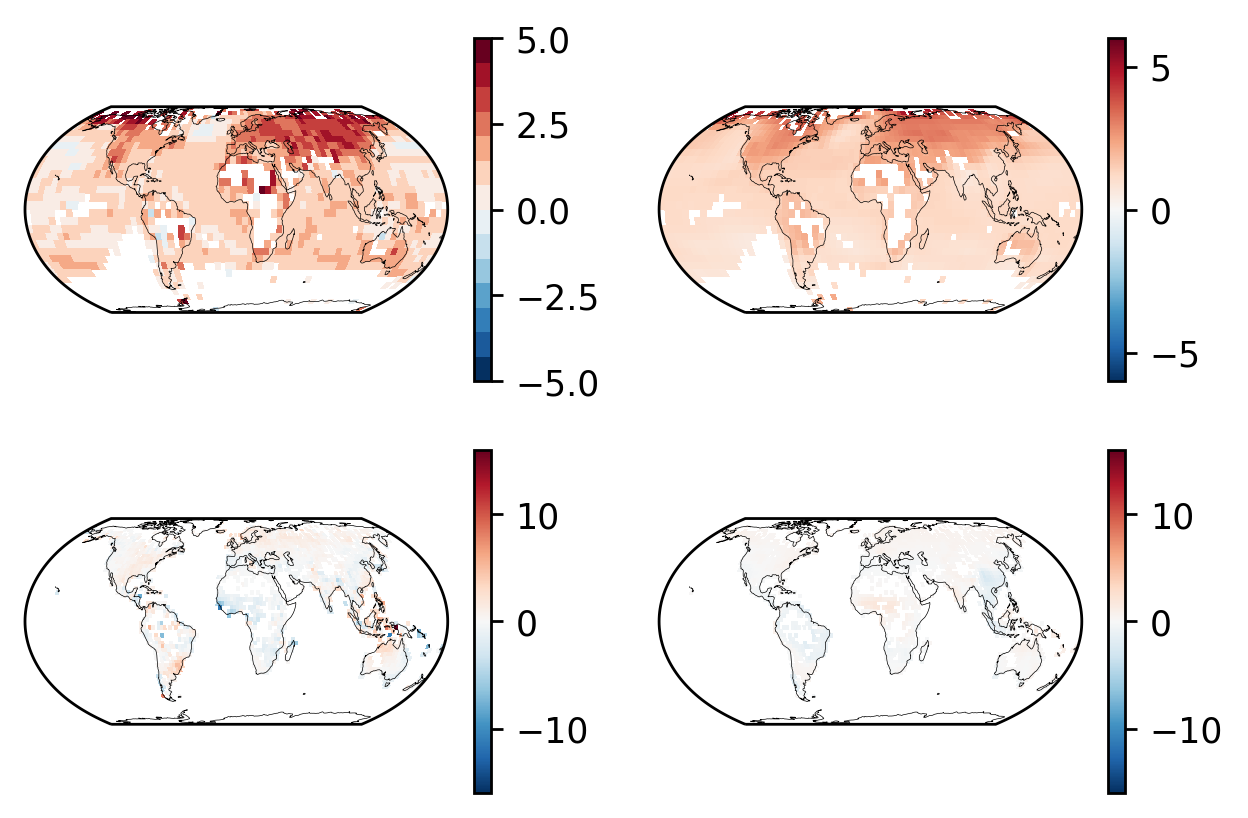

In [9]:
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import matplotlib.gridspec as gridspec

fig = plt.figure(constrained_layout=True, dpi=250)
gs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig, wspace=0.2)

##
ax = fig.add_subplot(gs[0,0],projection=ccrs.EqualEarth(),)
ax.coastlines(lw=0.2)
shape = (len(df.LAT.unique()), len(df.LON.unique()))

n = np.array(df.obs_temp).reshape(shape)

n[n==0] = np.NaN

mesh=ax.pcolormesh(
    df.LON.unique(), 
    df.LAT.unique(), 
    n, 
    cmap=plt.cm.get_cmap('RdBu_r',14), vmin=-5, vmax=5, 
    transform=ccrs.PlateCarree(),
)

cbar = plt.colorbar(mesh)

###
ax = fig.add_subplot(gs[0,1],projection=ccrs.EqualEarth(),)
ax.coastlines(lw=0.2)
shape = (len(df.LAT.unique()), len(df.LON.unique()))

n = np.array(df.af_temp).reshape(shape)

n[n==0] = np.NaN

mesh=ax.pcolormesh(
    df.LON.unique(), 
    df.LAT.unique(), 
    n, 
    cmap=plt.cm.get_cmap('RdBu_r'), vmin=-6, vmax=6, 
    transform=ccrs.PlateCarree(),
)

cbar = plt.colorbar(mesh)


#####
ax = fig.add_subplot(gs[1,0],projection=ccrs.EqualEarth(),)
ax.coastlines(lw=0.2)
shape = (len(df.LAT.unique()), len(df.LON.unique()))

n = np.array(df.obs_precip).reshape(shape)

n[n==0] = np.NaN

mesh=ax.pcolormesh(
    df.LON.unique(), 
    df.LAT.unique(), 
    n, 
    cmap=plt.cm.get_cmap('RdBu_r'), vmin=-16, vmax=16, 
    transform=ccrs.PlateCarree(),
)

cbar = plt.colorbar(mesh)


####
ax = fig.add_subplot(gs[1,1],projection=ccrs.EqualEarth(),)
ax.coastlines(lw=0.2)
shape = (len(df.LAT.unique()), len(df.LON.unique()))

n = np.array(df.af_precip).reshape(shape)

n[n==0] = np.NaN



mesh=ax.pcolormesh(
    df.LON.unique(), 
    df.LAT.unique(), 
    n, 
    cmap=plt.cm.get_cmap('RdBu_r'), vmin=-16, vmax=16, 
    transform=ccrs.PlateCarree(),
)

cbar = plt.colorbar(mesh)

Text(0.5, 0, 'Temperature trends °C/100 yr')

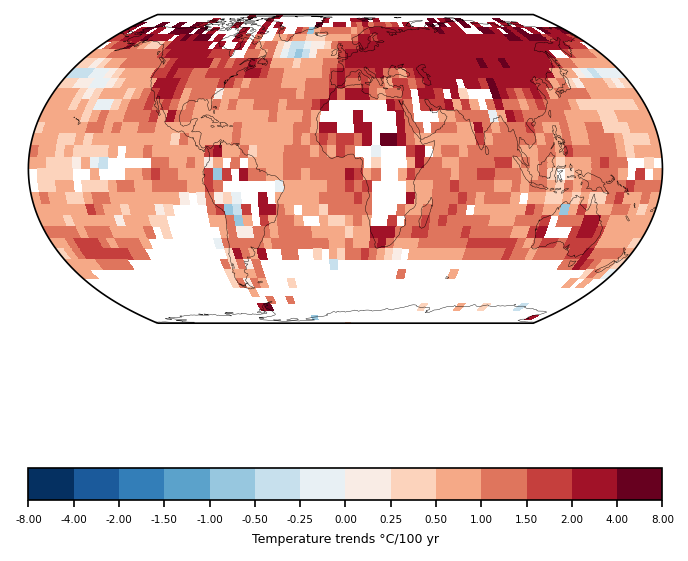

In [24]:
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import matplotlib.gridspec as gridspec
import matplotlib as mpl

fig = plt.figure(constrained_layout=True, dpi=150, figsize=(12,5))
gs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig, wspace=0.2, height_ratios=[1,0.1])

##
ax = fig.add_subplot(gs[0,0],projection=ccrs.EqualEarth(),)
ax.coastlines(lw=0.2)
shape = (len(df.LAT.unique()), len(df.LON.unique()))

n = np.array(df.obs_temp).reshape(shape)

bounds = np.array([-8,-4,-2,-1,-0.5,-.25,0,.25,.5,1,2,4,8])
bounds = np.array([-8,-4,-2,-1.5,-1,-0.5,-.25,0,.25,.5,1,1.5,2,4,8])
cmap_mgm = plt.cm.get_cmap('RdBu_r',len(bounds)-1)
colors = list(cmap_mgm(np.arange(len(bounds))))
cmap = mpl.colors.ListedColormap(colors, "")

mesh=ax.pcolormesh(
    df.LON.unique(), 
    df.LAT.unique(), 
    n, 
    cmap=cmap, 
    norm = mpl.colors.BoundaryNorm(bounds,ncolors=len(bounds)),
    transform=ccrs.PlateCarree(),
)

cax = fig.add_subplot(gs[1,0])
cax.axis('off')
cbar = plt.colorbar(
    mesh,ax=cax,orientation="horizontal",
    fraction=0.7, pad=0.05,
)

cbar.ax.tick_params(labelsize=5)

cbar.set_ticks(bounds)
cbar.set_ticklabels([f"{x:.2f}" for x in bounds])
cbar.ax.set_xlabel("Temperature trends °C/100 yr",fontsize=6)

In [11]:
[mpl.colors.rgb2hex(x) for x in colors]


['#053061',
 '#1b5a9b',
 '#337eb8',
 '#5ba2cb',
 '#97c7df',
 '#c7e0ed',
 '#e8f0f4',
 '#f9ece5',
 '#fcd3bc',
 '#f5a987',
 '#df755d',
 '#c53f3d',
 '#a11228',
 '#67001f',
 '#67001f']

Text(0.5, 0, 'Precipitation trends mm/yr/decade')

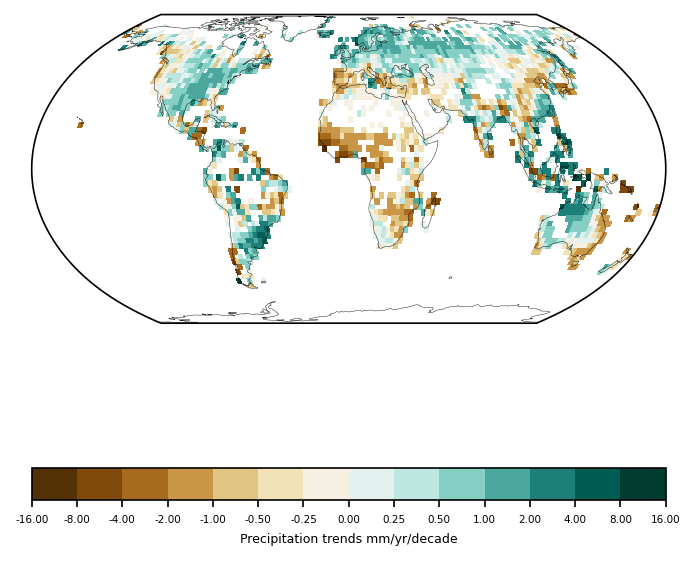

In [23]:
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import matplotlib.gridspec as gridspec
import matplotlib as mpl

fig = plt.figure(constrained_layout=True, dpi=150, figsize=(12,5))
gs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig, wspace=0.2, height_ratios=[1,0.1])

##
ax = fig.add_subplot(gs[0,0],projection=ccrs.EqualEarth(),)
ax.coastlines(lw=0.2)
shape = (len(df.LAT.unique()), len(df.LON.unique()))

n = np.array(df.obs_precip).reshape(shape)

bounds = np.array([-16,-8,-4,-2,-1,-0.5,-.25,0,.25,.5,1,2,4,8,16])
#bounds = np.array([-8,-4,-2,-1.5,-1,-0.5,-.25,0,.25,.5,1,1.5,2,4,8])
cmap_mgm = plt.cm.get_cmap('BrBG',len(bounds)-1)
colors = list(cmap_mgm(np.arange(len(bounds))))
cmap = mpl.colors.ListedColormap(colors, "")

mesh=ax.pcolormesh(
    df.LON.unique(), 
    df.LAT.unique(), 
    n, 
    cmap=cmap, 
    norm = mpl.colors.BoundaryNorm(bounds,ncolors=len(bounds)),
    transform=ccrs.PlateCarree(),
)

cax = fig.add_subplot(gs[1,0])
cax.axis('off')
cbar = plt.colorbar(
    mesh,ax=cax,orientation="horizontal",
    fraction=0.7, pad=0.05,
)

cbar.ax.tick_params(labelsize=5)

cbar.set_ticks(bounds)
cbar.set_ticklabels([f"{x:.2f}" for x in bounds])
cbar.ax.set_xlabel("Precipitation trends mm/yr/decade",fontsize=6)

In [13]:
[mpl.colors.rgb2hex(x) for x in colors]

['#543005',
 '#7f4909',
 '#a76b1d',
 '#c99546',
 '#e1c582',
 '#f2e2b8',
 '#f5f0e2',
 '#e3f1ef',
 '#bce6df',
 '#85cfc4',
 '#4ca89e',
 '#1d8078',
 '#015c53',
 '#003c30',
 '#003c30']

In [14]:

d = {
    "type": "FeatureCollection",
    "features": []
}
for i, row in df.fillna(5).iterrows():
    rdict = {
        "type": "Feature",
        "geometry": {
            "type": "LineString",
            "coordinates": [
                [row.LON-1.25,row.LAT-1.25],
                [row.LON-1.25,row.LAT+1.25],
                [row.LON+1.25,row.LAT+1.25],
                [row.LON+1.25,row.LAT-1.25],
                [row.LON-1.25,row.LAT-1.25],                
            ]
        }, 
        "index": row["index"]
    }
    d['features'].append(rdict)
    
with open('data/cells.json', 'w') as fp:
    json.dump(d, fp)

In [17]:
import json
df = df.rename(columns={
    "temp_study_prop": "Weighted studies on temperature",
    "all_study_prop": "Weighted studies",
    "updated_temp": "da_cat_temp",
    "updated_precip": "da_cat_precip"
})
d = {
    "type": "FeatureCollection",
    "features": []
}
cols = [
    "da_cat_temp","da_cat_precip","obs_temp","obs_precip","af_temp","af_precip",
    "LAT","LON"
]
#cols = df.columns

for i, row in df.fillna(-99).iterrows():
    rdict = {
        "type": "Feature",
        "geometry": {
            "type": "LineString",
            "coordinates": [
                [row.LON-1.25,row.LAT-1.25],
                [row.LON-1.25,row.LAT+1.25],
                [row.LON+1.25,row.LAT+1.25],
                [row.LON+1.25,row.LAT-1.25],
                [row.LON-1.25,row.LAT-1.25],                
            ]
        }, 
        "properties": {
            
        }
    }
    rdict["Temperature"] = row["da_cat_temp"]
    rdict["Precipitation"] = row["da_cat_precip"]
    
    for c in cols:
        if "LATasdf" in c or "LONasdf" in c:
            continue
        rdict[c] = row[c]
        rdict["properties"][c] = row[c]
    
    d['features'].append(rdict)
    
with open('data/da_data.json', 'w') as fp:
    json.dump(d, fp)

In [10]:
c = ["#ffed6f","#b2182b","#ef8a62","#fddbc7","#f7f7f7","#d1e5f0","#67a9cf","#2166ac","#33a02c"]

In [11]:
long_df = pd.read_csv('/home/max/Documents/papers/regional-impacts-map/data/2b_merged_da_data_impacts.csv')
long_df = long_df.sort_values(['LAT','LON'],ascending=[False, True])
print(long_df.shape)
#long_df['impact'] = [x.split()[0] for x in long_df['impact']]
long_df.head()

(217728, 6)


,index,LAT,LON,weight,driver,impact
10224,10224,88.75,-178.75,0.462597,all,all
20592,10224,88.75,-178.75,0.075289,all,Coastal and marine Ecosystems
30960,10224,88.75,-178.75,0.001570,all,Human and managed
41328,10224,88.75,-178.75,0.224276,all,"Mountains, snow and ice"
51696,10224,88.75,-178.75,0.015664,all,"Rivers, lakes, and soil moisture"


In [12]:
# df = df.rename(columns={
#     "da_cat_temp":"Temperature",
#     "da_cat_precip":"Precipitation",
#     "temp_study_prop": "Weighted studies on temperature",
#     "all_study_prop": "Weighted studies"
# })
d = {
    "type": "FeatureCollection",
    "features": []
}
cols = [x for x in long_df.columns if x!="index"]
for i, row in long_df.fillna(5).iterrows():
    rdict = {
        "type": "Feature",
        "index": row["index"],
        "properties": {}
    }
    for c in cols:
        if "LATasdf" in c or "LONasdf" in c:
            continue
        #rdict[c] = row[c]
        rdict["properties"][c] = row[c]
    
    d['features'].append(rdict)
    
with open('data/ws_data.json', 'w') as fp:
    json.dump(d, fp)

In [14]:
if "da_cat_precip" not in long_df.columns:
    long_df = long_df.merge(df[['index','da_cat_precip','da_cat_temp']])
print(long_df.shape)
long_df.head()


(217728, 8)


,index,LAT,LON,weight,driver,impact,updated_precip,updated_temp
0,10224,88.75,-178.75,0.462597,all,all,NaN,NaN
1,10224,88.75,-178.75,0.075289,all,Coastal and marine Ecosystems,NaN,NaN
2,10224,88.75,-178.75,0.001570,all,Human and managed,NaN,NaN
3,10224,88.75,-178.75,0.224276,all,"Mountains, snow and ice",NaN,NaN
4,10224,88.75,-178.75,0.015664,all,"Rivers, lakes, and soil moisture",NaN,NaN


In [15]:
wide_df = long_df.pivot(
    values="weight",
    columns="driver",
    index=["index","impact","da_cat_precip","da_cat_temp"]
).reset_index()

# Add weights where both precip and temp are d&A
idx = wide_df.loc[
    (wide_df['da_cat_precip'].isin([2,3])) & (wide_df['da_cat_temp'].isin([2,3]))
].index
wide_df.loc[idx,"merged_weight"] = wide_df.loc[idx,"Temperature"] + wide_df.loc[idx,"Precipitation"] 
wide_df.loc[idx, "n_da_impacts"] = 2

# Add weights where neither precip nor temp are d&A
idx = wide_df.loc[
    (~wide_df['da_cat_precip'].isin([2,3])) & (~wide_df['da_cat_temp'].isin([2,3]))
].index
wide_df.loc[idx,"merged_weight"] = wide_df.loc[idx,"Temperature"] + wide_df.loc[idx,"Precipitation"] 
wide_df.loc[idx, "n_da_impacts"] = 0


# Add weights where both precip and temp are d&A
idx = wide_df.loc[
    (wide_df['da_cat_precip'].isin([2,3])) & (~wide_df['da_cat_temp'].isin([2,3]))
].index
wide_df.loc[idx,"merged_weight"] = wide_df.loc[idx,"Precipitation"] 
wide_df.loc[idx, "n_da_impacts"] = 1

# Add weights where both precip and temp are d&A
idx = wide_df.loc[
    (~wide_df['da_cat_precip'].isin([2,3])) & (wide_df['da_cat_temp'].isin([2,3]))
].index
wide_df.loc[idx,"merged_weight"] = wide_df.loc[idx,"Temperature"] 
wide_df.loc[idx, "n_da_impacts"] = 1

wide_df.head()

driver,index,impact,updated_precip,updated_temp,Precipitation,Temperature,all,merged_weight,n_da_impacts
0,0,Coastal and marine Ecosystems,NaN,NaN,0.0,0.0,0.0,0.0,0.0
1,0,Human and managed,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2,0,"Mountains, snow and ice",NaN,NaN,0.0,0.0,0.0,0.0,0.0
3,0,Other systems,NaN,NaN,0.0,0.0,0.0,0.0,0.0
4,0,"Rivers, lakes, and soil moisture",NaN,NaN,0.0,0.0,0.0,0.0,0.0


In [16]:
import numpy as np

long_df = long_df.merge(wide_df[["index","impact","merged_weight","n_da_impacts"]])
long_df.loc[long_df["driver"]=="all","weight"] = long_df.loc[long_df["driver"]=="all","merged_weight"]
tidx = long_df[long_df['driver']=="Temperature"].index
pidx = long_df[long_df['driver']=="Precipitation"].index

long_df.loc[tidx,"n_da_impacts"] = np.where((long_df.loc[tidx]["da_cat_temp"].isin([2,3])),1,0)
long_df.loc[pidx,"n_da_impacts"] = np.where((long_df.loc[pidx]["da_cat_precip"].isin([2,3])),1,0)
print(long_df.shape)
long_df.head()

(217728, 10)


,index,LAT,LON,weight,driver,impact,updated_precip,updated_temp,merged_weight,n_da_impacts
0,10224,88.75,-178.75,0.327727,all,all,NaN,NaN,0.327727,0.0
1,10224,88.75,-178.75,0.310488,Temperature,all,NaN,NaN,0.327727,0.0
2,10224,88.75,-178.75,0.017239,Precipitation,all,NaN,NaN,0.327727,0.0
3,10224,88.75,-178.75,0.029793,all,Coastal and marine Ecosystems,NaN,NaN,0.029793,0.0
4,10224,88.75,-178.75,0.029793,Temperature,Coastal and marine Ecosystems,NaN,NaN,0.029793,0.0


In [17]:
lots = 20
little = 5


#lots = 5
#little =1

def cat_evidence(df, lots, little):

    df.loc[
        (abs(df['n_da_impacts'])>0) & (df['weight']<little),"evidence_cat"
    ] = 1

    df.loc[
        (abs(df['n_da_impacts'])>0) & (df['weight']>=little),"evidence_cat"
    ] = 2

    df.loc[
        (abs(df['n_da_impacts'])>0) & (df['weight']>=lots),"evidence_cat"
    ] = 3

    df.loc[
        (abs(df['n_da_impacts'])==0) & (df['weight']<little),"evidence_cat"
    ] = 4

    df.loc[
        (abs(df['n_da_impacts'])==0) & (df['weight']>=little),"evidence_cat"
    ] = 5

    df.loc[
        (abs(df['n_da_impacts'])==0) & (df['weight']>=lots),"evidence_cat"
    ] = 6
    
    return df

long_df = cat_evidence(long_df, lots, little)
print(long_df.shape)
long_df.head()

(217728, 11)


,index,LAT,LON,weight,driver,impact,updated_precip,updated_temp,merged_weight,n_da_impacts,evidence_cat
0,10224,88.75,-178.75,0.327727,all,all,NaN,NaN,0.327727,0.0,4.0
1,10224,88.75,-178.75,0.310488,Temperature,all,NaN,NaN,0.327727,0.0,4.0
2,10224,88.75,-178.75,0.017239,Precipitation,all,NaN,NaN,0.327727,0.0,4.0
3,10224,88.75,-178.75,0.029793,all,Coastal and marine Ecosystems,NaN,NaN,0.029793,0.0,4.0
4,10224,88.75,-178.75,0.029793,Temperature,Coastal and marine Ecosystems,NaN,NaN,0.029793,0.0,4.0


In [18]:
long_df.head()

,index,LAT,LON,weight,driver,impact,updated_precip,updated_temp,merged_weight,n_da_impacts,evidence_cat
0,10224,88.75,-178.75,0.327727,all,all,NaN,NaN,0.327727,0.0,4.0
1,10224,88.75,-178.75,0.310488,Temperature,all,NaN,NaN,0.327727,0.0,4.0
2,10224,88.75,-178.75,0.017239,Precipitation,all,NaN,NaN,0.327727,0.0,4.0
3,10224,88.75,-178.75,0.029793,all,Coastal and marine Ecosystems,NaN,NaN,0.029793,0.0,4.0
4,10224,88.75,-178.75,0.029793,Temperature,Coastal and marine Ecosystems,NaN,NaN,0.029793,0.0,4.0


In [19]:
# df = df.rename(columns={
#     "da_cat_temp":"Temperature",
#     "da_cat_precip":"Precipitation",
#     "temp_study_prop": "Weighted studies on temperature",
#     "all_study_prop": "Weighted studies"
# })
d = {
    "type": "FeatureCollection",
    "features": []
}
cols = [x for x in long_df.columns if x not in ["index","n_da_impacts","merged_weight"]]
for i, row in long_df.fillna(5).iterrows():
    rdict = {
        "type": "Feature",
        "index": row["index"],
        "properties": {}
    }
    for c in cols:
        if "LATasdf" in c or "LONasdf" in c:
            continue
        #rdict[c] = row[c]
        rdict["properties"][c] = row[c]
    
    d['features'].append(rdict)
    
with open('data/ws_da_data.json', 'w') as fp:
    json.dump(d, fp)

In [19]:
long_df[pd.isna(long_df['evidence_cat'])]

,index,LAT,LON,weight,driver,impact,Precipitation attribution category,Temperature attribution category,merged_weight,n_da_impacts,evidence_cat


In [44]:
shp_ndf_df = pd.read_csv('/home/max/Documents/papers/regional-impacts-map/data/2_country_data.csv')
print(shp_ndf_df.shape)
shp_ndf_df = shp_ndf_df[['ndf_id','Income category']].rename(columns={"ndf_id":"index"}).merge(df[["index","population","area","is_land"]])
shp_ndf_df = shp_ndf_df[shp_ndf_df['is_land']]
shp_ndf_df = shp_ndf_df.drop_duplicates(['index'])
shp_ndf_df['population'] = shp_ndf_df['population'] / shp_ndf_df.groupby('Income category')['population'].transform(sum)
shp_ndf_df['area'] = shp_ndf_df['area'] / shp_ndf_df.groupby('Income category')['area'].transform(sum)

shp_ndf_df.to_json('data/country_cell.json',orient="records")
print(shp_ndf_df.shape)
shp_ndf_df.head()


(3533, 101)
(2207, 5)


,index,Income category,population,area,is_land
0,4114.0,5. Low income,0.000193,0.004438,True
1,3971.0,5. Low income,0.001815,0.004368,True
2,4115.0,5. Low income,0.001593,0.004438,True
3,3972.0,5. Low income,0.002173,0.004368,True
4,4116.0,5. Low income,0.001907,0.004438,True


In [34]:
shp_ndf_df[pd.isna(shp_ndf_df['area'])]

,index,Income category,population,area


In [39]:
df.columns

Index(['LAT', 'LON', 'LAT_25', 'LON_25', 'LAT_5', 'LON_5', 'knutson_precip',
       'Precipitation attribution category', 'knutson_temp',
       'Temperature attribution category', 'population', 'diff_temp',
       'diff_precip', 'index', 'Weighted studies', 'all_study_prop_upper',
       'all_study_prop_lower', 'WA', 'Weighted studies on temperature',
       'temp_study_prop_upper', 'temp_study_prop_lower', 'precip_study_prop',
       'precip_study_prop_upper', 'precip_study_prop_lower', 'precip_da_cat',
       'temp_da_cat', 'temp_da_binary', 'precip_da_binary', 'n_da_impacts',
       'max_da_cat', 'study_addition', 'total_study_prop', 'area', 'is_land'],
      dtype='object')

In [42]:
df.sort_values('Weighted studies').tail()[['LAT','LON','Weighted studies']]

,LAT,LON,Weighted studies
2690,-43.75,66.25,642.312399
7237,36.25,-86.25,667.541456
6804,28.75,-88.75,768.906615
5256,1.25,1.25,893.356382
7029,31.25,113.75,5199.667584


In [21]:
# df = df.rename(columns={
#     "da_cat_temp":"Temperature",
#     "da_cat_precip":"Precipitation",
#     "temp_study_prop": "Weighted studies on temperature",
#     "all_study_prop": "Weighted studies"
# })
d = {
    "type": "FeatureCollection",
    "features": []
}
cols = [x for x in long_df.columns if x!="index"]
for i, row in long_df.fillna(0).iterrows():
    rdict = {
        "type": "Feature",
        "index": row["index"],
        "properties": {}
    }
    for c in cols:
        if "LATasdf" in c or "LONasdf" in c:
            continue
        #rdict[c] = row[c]
        rdict["properties"][c] = row[c]
    
    d['features'].append(rdict)
    
with open('data/ws_da_data.json', 'w') as fp:
    json.dump(d, fp)

In [22]:
shp_ndf_df.shape

(3533, 4)